In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression , Ridge, Lasso,ElasticNet,LassoCV,RidgeCV,ElasticNetCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv(
    filepath_or_buffer="http://lib.stat.cmu.edu/datasets/boston",
    sep='\s+',
    skiprows=21,
    header=None,
)

columns = [
    'CRIM',
    'ZN',
    'INDUS',
    'CHAS',
    'NOX',
    'RM',
    'AGE',
    'DIS',
    'RAD',
    'TAX',
    'PTRATIO',
    'B',
    'LSTAT',
    'MEDV',
]

#Flatten all the values into a single long list and remove the nulls
values_w_nulls = df.values.flatten()
all_values = values_w_nulls[~np.isnan(values_w_nulls)]

#Reshape the values to have 14 columns and make a new df out of them
df = pd.DataFrame(
    data = all_values.reshape(-1, len(columns)),
    columns = columns,
)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


<Axes: >

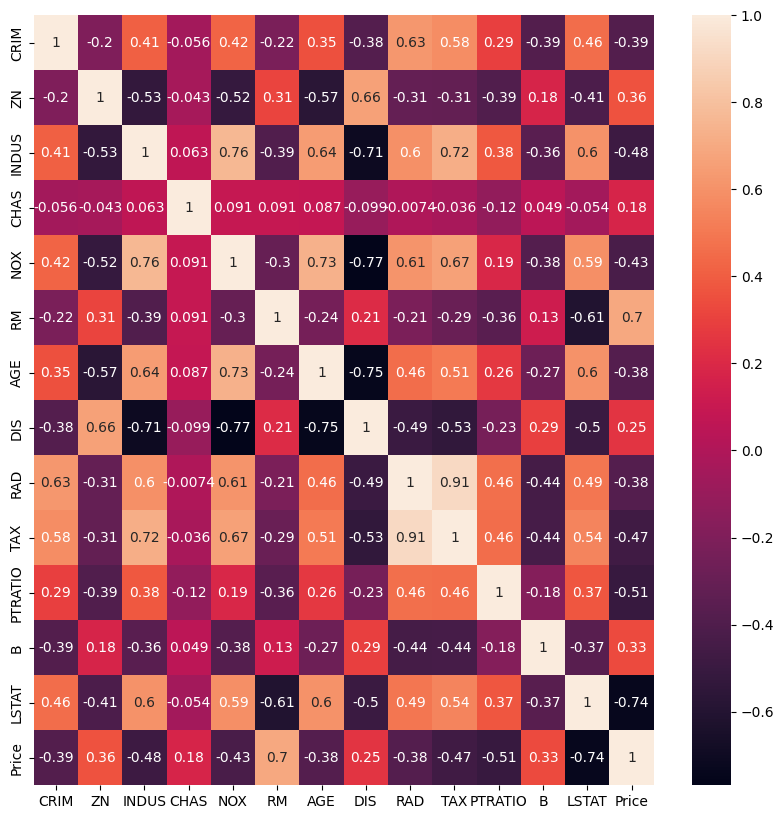

In [ ]:




boston_df=df
#target variable
boston_df['Price']=boston_df['MEDV']
boston_df = boston_df.drop('MEDV', axis=1)

#preview
boston_df.head()

#Exploration
plt.figure(figsize = (10, 10))
sns.heatmap(boston_df.corr(), annot = True)

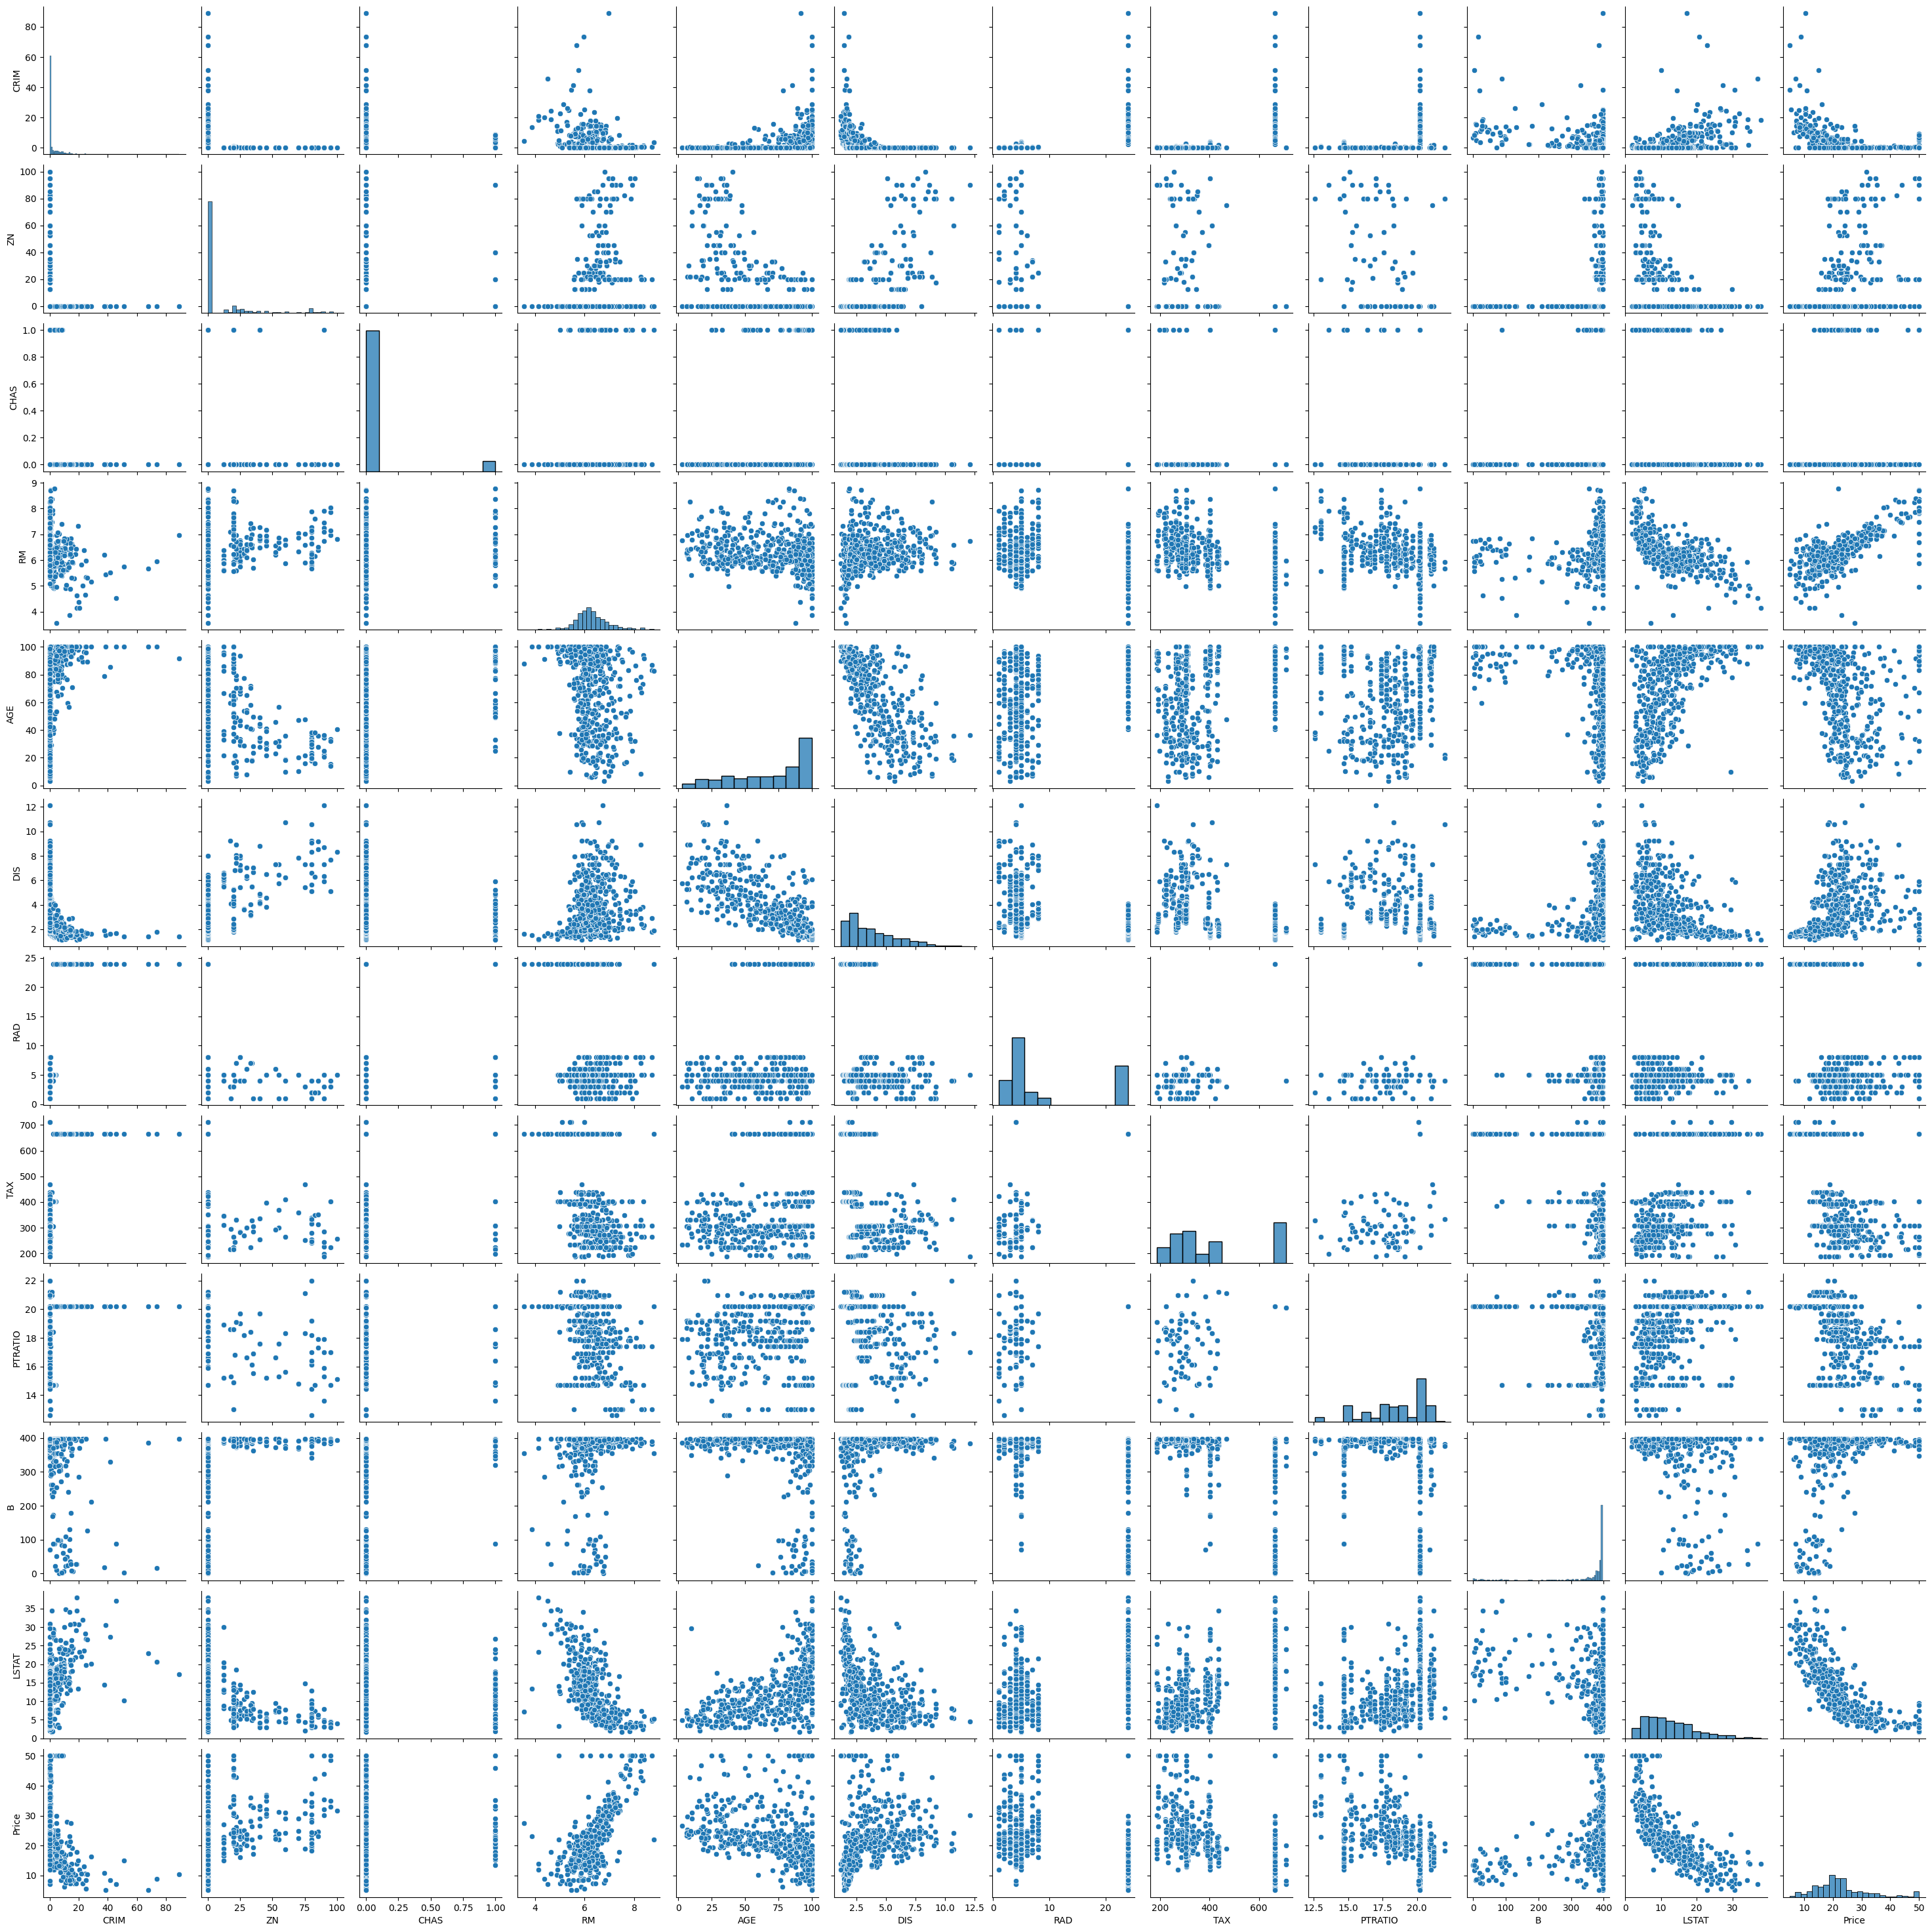

In [ ]:
#There are cases of multicolinearity, we will drop a few columns
boston_df.drop(columns = ["INDUS", "NOX"], inplace = True)

#pairplot
sns.pairplot(boston_df)

#we will log the LSTAT Column
boston_df.LSTAT = np.log(boston_df.LSTAT)


In [ ]:
#preview
features = boston_df.columns[0:11]
target = boston_df.columns[-1]

#X and y values
X = boston_df[features].values
y = boston_df[target].values

#splot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)


print("The dimension of X_train is {}".format(X_train.shape))
print("The dimension of X_test is {}".format(X_test.shape))
#Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


The dimension of X_train is (354, 11)
The dimension of X_test is (152, 11)


In [ ]:
#Model
lr = LinearRegression()

#Fit model
lr.fit(X_train, y_train)

#predict
prediction = lr.predict(X_test)

#actual
actual = y_test

train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)

print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))

predictedx = lr.predict(X_test)

mae = mean_absolute_error(y_test , predictedx)
mse = mean_squared_error(y_test , predictedx)
rmse = np.sqrt(mse)
r2=r2_score(y_test , predictedx)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")
print(100*'_')



#Ridge Regression Model
l2 = Ridge(alpha=1)

l2.fit(X_train,y_train)

#train and test scorefor ridge regression
train_score_ridge = l2.score(X_train, y_train)
test_score_ridge = l2.score(X_test, y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))


predictedx = l2.predict(X_test)

mae = mean_absolute_error(y_test  , predictedx)
mse = mean_squared_error(y_test  , predictedx)
rmse = np.sqrt(mse)
r2=r2_score(y_test  , predictedx)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")
print(100*'_')


#Ridge Regression Model
l1 = Lasso(alpha=10)

l1.fit(X_train,y_train)

#train and test scorefor ridge regression
train_score_Lasso = l1.score(X_train, y_train)
test_score_Lasso = l1.score(X_test, y_test)

print("\nLasso Model............................................\n")
print("The train score for LASSO model is {}".format(train_score_Lasso))
print("The test score for LASSO model is {}".format(test_score_Lasso))

predictedx = l1.predict(X_test)

mae = mean_absolute_error(y_test  , predictedx)
mse = mean_squared_error(y_test  , predictedx)
rmse = np.sqrt(mse)
r2=r2_score(y_test  , predictedx)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")
print(100*'_')


The train score for lr model is 0.7859187129718976
The test score for lr model is 0.7672379770848983
MAE: 2.980271663129378
MSE: 17.65122743200764
RMSE: 4.201336386437967
R2: 0.7672379770848983
____________________________________________________________________________________________________

Ridge Model............................................

The train score for ridge model is 0.785897306595126
The test score for ridge model is 0.767651055485116
MAE: 2.970476576931129
MSE: 17.61990212945967
RMSE: 4.197606714481441
R2: 0.767651055485116
____________________________________________________________________________________________________

Lasso Model............................................

The train score for LASSO model is 0.0
The test score for LASSO model is -0.0030704836212473996
MAE: 6.254322777282189
MSE: 76.066641005223
RMSE: 8.72161917336586
R2: -0.0030704836212473996
____________________________________________________________________________________________________


In [ ]:


#Lasso Cross validation
lasso_cv = LassoCV(alphas = [0.000001,0.00001,0.0001, 0.001,0.01, 0.1, 1, 10], random_state=0).fit(X_train, y_train)


#score
print(lasso_cv.score(X_train, y_train))
print(lasso_cv.score(X_test, y_test))
print(lasso_cv.alpha_ )

0.7859187129714189
0.7672379716322455
1e-06


In [ ]:

Ridge_cv =RidgeCV(alphas=[0.000001,0.00001,0.0001, 0.001,0.01, 0.1, 1,2,2.3,2.4,3,5, 10]).fit(X_train, y_train)


#score
print(Ridge_cv.score(X_train, y_train))
print(Ridge_cv.score(X_test, y_test))
print(Ridge_cv.alpha_ )


0.7858120028680391
0.7681164386094748
2.3


In [ ]:
ElasticNet_cv =ElasticNetCV(alphas = [0.0001, 0.001,0.01, 0.1,1,2],l1_ratio =[0.01,.1, .5, .7, .9, .95, .99, 1]).fit(X_train, y_train)


#score
print(ElasticNet_cv.score(X_train, y_train))
print(ElasticNet_cv.score(X_test, y_test))
print(ElasticNet_cv.alpha_ )
print(ElasticNet_cv.l1_ratio_)

0.7859159826341044
0.7673885376977991
0.001
0.01
